In [15]:
import numpy as np
import setigen as stg
from blimpy import Waterfall
import matplotlib.pyplot as plt
import random
import os
from astropy import units as u
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras import layers

os.environ["CUDA_VISIBLE_DEVICES"]="1"
num_classes = 10
num_samples_per_class = 5

In [16]:
def painting(data):
    all_data = []
    labels = []
    for c in range(num_classes):
        drift = 2*random.random()*(-1)**random.randint(0,2)
        snr = random.randint(100, 150)
        width = random.randint(20, 50)
        for s in range(num_samples_per_class):
            index = random.randint(0, data.shape[0]-1)
            window = data[index, :,:]
            
            start = random.randint(50, 180)
            
            frame = stg.Frame.from_data(df=2.7939677238464355*u.Hz,
                                        dt=18.253611008*u.s,
                                        fch1=1289*u.MHz,
                                        ascending=True,
                                        data=window)
            frame.add_signal(stg.constant_path(
                                        f_start=frame.get_frequency(index=start),
                                       drift_rate=drift*u.Hz/u.s),
                                      stg.constant_t_profile(level=frame.get_intensity(snr=snr)),
                                      stg.gaussian_f_profile(width=width*u.Hz),
                                      stg.constant_bp_profile(level=1))
            all_data.append(frame.data)
            labels.append(c)
    all_data = np.array(all_data)
    labels = np.vstack(labels)
    return all_data, labels

In [17]:
import cv2
import numpy as np


In [18]:
from tqdm import tqdm
import gc
import keras
from AE import AE

In [19]:
import os
from tqdm import tqdm
total_scores = []

directory = os.fsencode( "../../../../../datax/scratch/pma/reverse_search/test/")
count = 0
data = []
for folder in os.listdir(directory):
    print(folder)
    for subfolder in os.listdir(directory+folder):
        back = os.fsencode( "/")
        if '.' not in str(subfolder):
            for file in os.listdir(directory+folder+back+subfolder):
                file_directory = str(os.path.join(directory+folder+back+subfolder, file)).replace('b', '').replace("'","")
                if 'filtered.npy' in file_directory:
                    data.append(np.load(str(file_directory)))
                    count += 1
data = np.vstack(data)
print(data.shape)
injected, labels = painting(data)
    


b'HIP104887-1850'
b'HIP87579-1008'
b'clustering_tests'
(347064, 16, 256)


In [20]:
injected.shape

(50, 16, 256)

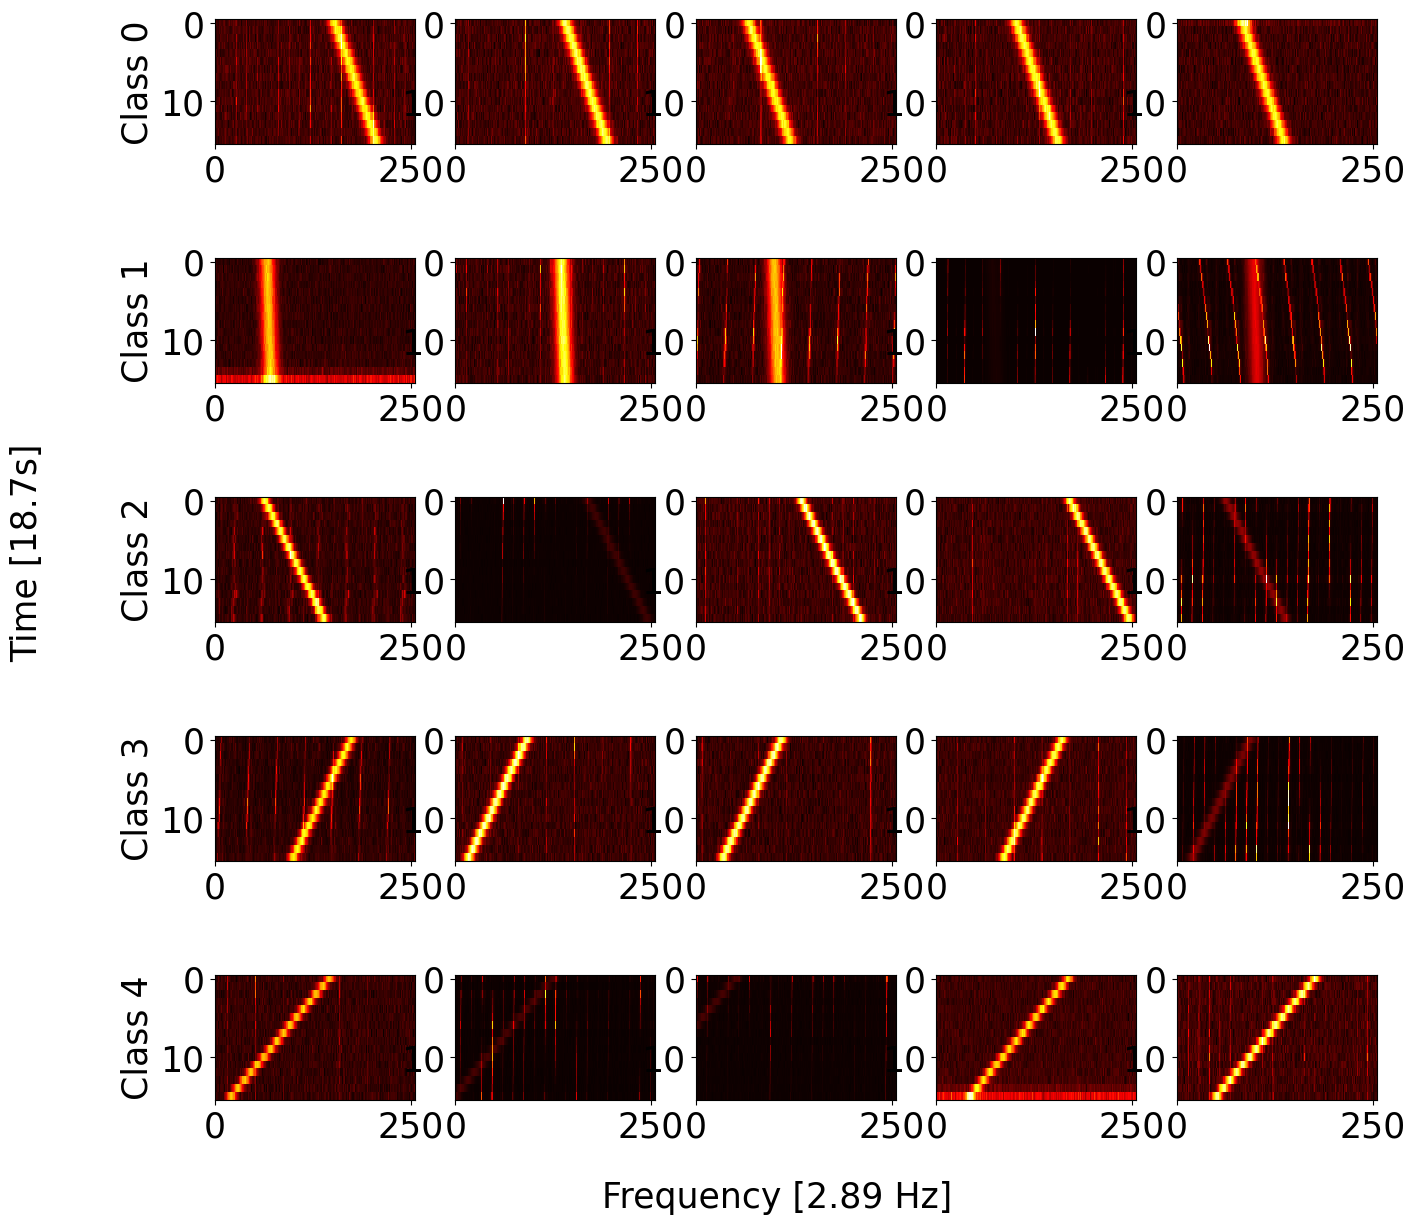

In [36]:
%matplotlib inline
font_size = 25
plt.rcParams.update({'font.size': font_size})
f, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,15))

count = 0
row_count = 0
for row in ax:
    col_count = 0 
    for col in row:
        im = col.imshow(injected[count,:,  :], cmap='hot', interpolation='nearest', aspect=10) 
        count += 1
        if col_count == 0:
            col.set_ylabel("Class "+str(row_count),  fontsize=font_size)  
        # if col_count ==0 and row_count == 2:
        #     col.set_ylabel("Time [18.7s]",  fontsize=font_size*2)  
        col_count+=1
    row_count +=1

f.text(0.5, 0.07, 'Frequency [2.89 Hz]', ha='center', va='center', rotation=0, 
       fontsize=font_size)
f.text(-0.0, 0.50, 'Time [18.7s]', ha='center', va='center', rotation=90, 
       fontsize=font_size)
plt.savefig("class.pdf", format="pdf")
plt.show()
